# Visualiesierung eines Neuronalen Nertzwerkes

Module Importieren:


In [1]:
import cv2, os
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import glob
from PIL import Image
from keras.models import load_model
import utils
from IPython.display import Image
import time

Using TensorFlow backend.


Bildgrösse Festlegen:


In [2]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

Model laden:
    

In [3]:
model = load_model('Data/Model/model.h5')
print("Model bereit")

/home/ocp/anaconda3/envs/herbie/lib/python3.5/site-packages/keras/engine/topology.py:1271: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), kernel_initializer="glorot_uniform", use_bias=True, strides=[2, 2], padding="valid", data_format="channels_last", trainable=True, activation="elu", name="convolution2d_1", activity_regularizer=None, kernel_constraint=None, bias_regularizer=None, bias_constraint=None, kernel_regularizer=None, filters=24)`
  return cls(**config)
/home/ocp/anaconda3/envs/herbie/lib/python3.5/site-packages/keras/engine/topology.py:1271: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), kernel_initializer="glorot_uniform", use_bias=True, strides=[2, 2], padding="valid", data_format="channels_last", trainable=True, activation="elu", name="convolution2d_2", activity_regularizer=None, kernel_constraint=None, bias_regularizer=None, bias_constraint=None, kernel_regularizer=None, filters=36)`
  return 

Model bereit


/home/ocp/anaconda3/envs/herbie/lib/python3.5/site-packages/keras/models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Trainingsdaten Laden:

In [4]:
data_df = pd.read_csv(os.path.join(os.getcwd(), 'Data/Log', 'driving_log.csv'), names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

X = data_df['center'].values
y = data_df['steering'].values

Array der Bilder

In [5]:
print(X)

[ '/home/ocp/Schreibtisch/Herbie/Data/Image/center_2018_05_23_17_49_46_341.jpg'
 '/home/ocp/Schreibtisch/Herbie/Data/Image/center_2018_05_23_17_49_46_497.jpg'
 '/home/ocp/Schreibtisch/Herbie/Data/Image/center_2018_05_23_17_49_46_650.jpg'
 ...,
 '/home/ocp/Schreibtisch/Herbie/Data/Image/center_2018_05_22_17_05_06_175.jpg'
 '/home/ocp/Schreibtisch/Herbie/Data/Image/center_2018_05_22_17_05_06_319.jpg'
 '/home/ocp/Schreibtisch/Herbie/Data/Image/center_2018_05_22_17_05_06_467.jpg']


Sequenze der Steeringwerte

In [6]:
print(y)

[ 0.  0.  0. ..., -1.  0. -1.]


Batchsize der Trainingsdaten

In [7]:
print("Schärfe des Image Arrays:     " + str(X.shape))
print("Schärfe der Steering Sequenz: " + str(y.shape))

Schärfe des Image Arrays:     (5180,)
Schärfe der Steering Sequenz: (5180,)


Overlay mit Orginal und Predict Werten erzeugen und als Video speichern

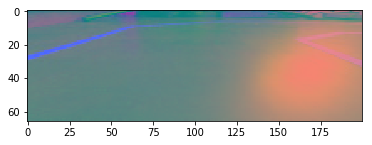

In [22]:
from matplotlib.pyplot import imshow

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('test.mp4', fourcc, 6.0, (360, 180))
i=0
L = list()
shape=y.shape[0]
#print(shape)
while i <= (shape - 1):
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (0,160)
    fontScale              = 1
    fontColor              = (0,255,0)
    lineType               = 2
    
    d = X[i]    
    e = y[i]
    
    img = cv2.imread(d)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    __image1 = utils.preprocess(img)
    __image2 = np.asarray(__image1, dtype=np.float32)
    __image = np.array([__image2]) 
    __steering_angle = float(model.predict(__image, batch_size=1))
    L.append(__steering_angle)
    __steering_angle = round(__steering_angle, 2)
    if i <= 2:
        imshow(__image1)
    cv2.putText(img,str(e), 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)

    e = int(e * 120) 

    cv2.line(img,(160 + e,80),(160,160),(0,255,0),2)

    fontColor              = (0,0,255)
    bottomLeftCornerOfText = (0,120)

    cv2.putText(img,str(__steering_angle), 
        bottomLeftCornerOfText, 
        font, 
        fontScale,
        fontColor,
        lineType)

    __steering_angle = int(__steering_angle * 120)
    cv2.line(img,(160 + __steering_angle,80),(160,160),(0,0,255),2)

    out.write(img)
    #cv2.imwrite("Data/Imagetext/"+ str(i) + ".jpg", img)
    #cv2.imshow('image',img)
    #cv2.waitKey(0)
    
    i = i+1
cv2.destroyAllWindows
s = np.array(L)
out.release()
#print(s)

Video Anzeigen

In [9]:
%%HTML
<video width="640" height="480" controls>
  <source src="test.mp4" type="video/mp4">
</video>

In [10]:
data_df = pd.read_csv(os.path.join(os.getcwd(), 'Data/Log', 'driving_log.csv'), names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])

X = data_df['center'].values
y = data_df['steering'].values


L = list()

i=0
shape=y.shape[0]
print(shape)

while i <= (shape -1):
    d = X[i]
    e = y[i]
    img = mpimg.imread(d)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    __image1 = utils.preprocess(img)
    __image2 = np.asarray(__image1, dtype=np.float32)
    __image = np.array([__image2]) 
    __steering_angle = float(model.predict(__image, batch_size=1))
    #test_P = test_P.reshape((test_P.shape[0],)) 
    __steering_angle
    L.append(__steering_angle)
    #print(liste)
    #print("---")
    i = i+1


s = np.array(L)

print("Schärfe des Image Arrays:     " + str(s.shape)) 
print(s)
#print(y)

5180
Schärfe des Image Arrays:     (5180,)
[-0.2525405  -0.28661656 -0.26221082 ..., -0.78221101  0.01161146
  0.04118381]


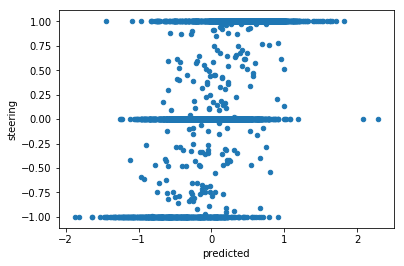

In [11]:
df = pd.DataFrame({'predicted':s, 'steering':y})
ax = df.plot.scatter('predicted', 'steering')


Text(0,0.5,'steering angle')

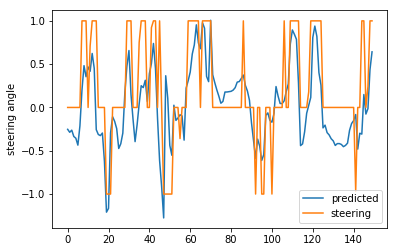

In [12]:
ax = pd.DataFrame({'predicted':s[:150], 'steering':y[:150]}).plot()
ax.set_ylabel("steering angle")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a35ac7c18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1a35b3e940>]], dtype=object)

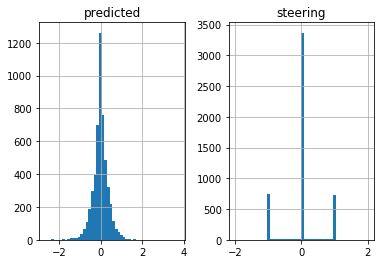

In [13]:
df.diff().hist(bins=50)

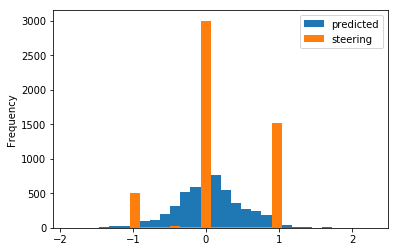

In [14]:
df.plot.hist(stacked=False, bins=30)

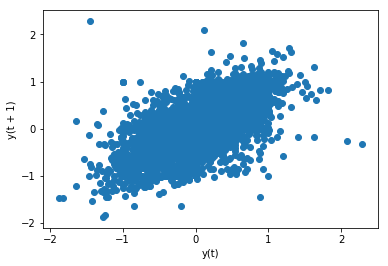

In [15]:
from pandas.plotting import lag_plot
lag_plot(df)

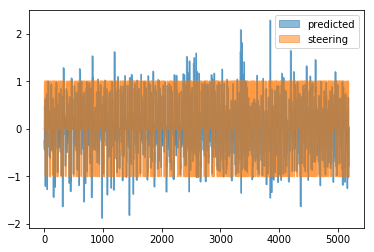

In [16]:
df.plot.area(stacked=False);